MIGUEL CHAVEINTE GARCÍA

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt

Función de formación de secuencias

In [ ]:
# Division of a global sequences into n_step size ones (X) with the corresponding prediction desired (y)
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
data = pd.read_excel("iberdrola.xls")
data.head()

,Fecha,Último
0,29-nov-2019,8.928
1,28-nov-2019,8.916
2,27-nov-2019,8.928
3,26-nov-2019,8.896
4,25-nov-2019,8.898


In [ ]:
max(data.Último)

9.536

In [ ]:
XMAX=15.0
T=20
X_data,y_data=split_sequence(data['Último'],T)
X=X_data/XMAX
y=y_data/XMAX
n_features=1
X=X.reshape((X.shape[0],X.shape[1],n_features))

In [ ]:
X

array([[[0.5952    ],
        [0.5944    ],
        [0.5952    ],
        ...,
        [0.6032    ],
        [0.60266667],
        [0.60906667]],

       [[0.5944    ],
        [0.5952    ],
        [0.59306667],
        ...,
        [0.60266667],
        [0.60906667],
        [0.61173333]],

       [[0.5952    ],
        [0.59306667],
        [0.5932    ],
        ...,
        [0.60906667],
        [0.61173333],
        [0.61386667]],

       ...,

       [[0.4132    ],
        [0.41613333],
        [0.4156    ],
        ...,
        [0.38313333],
        [0.38193333],
        [0.385     ]],

       [[0.41613333],
        [0.4156    ],
        [0.41426667],
        ...,
        [0.38193333],
        [0.385     ],
        [0.37206667]],

       [[0.4156    ],
        [0.41426667],
        [0.41253333],
        ...,
        [0.385     ],
        [0.37206667],
        [0.37326667]]])

División TRAINING y TEST

In [ ]:
P=y.shape[0]
a=np.arange(P,dtype=int)

np.random.shuffle(a)
sequences_train=a[0:int(P*2/3)]
sequences_test=a[int(P*2/3):]

X_train=X[sequences_train]
X_test=X[sequences_test]
y_train=y[sequences_train]
y_test=y[sequences_test]

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((480, 20, 1), (240, 20, 1), (480,), (240,))

In [ ]:
X_train

array([[[0.4464    ],
        [0.45133333],
        [0.44693333],
        ...,
        [0.41946667],
        [0.4212    ],
        [0.41706667]],

       [[0.40326667],
        [0.40026667],
        [0.39286667],
        ...,
        [0.402     ],
        [0.402     ],
        [0.40446667]],

       [[0.4376    ],
        [0.43386667],
        [0.43693333],
        ...,
        [0.4184    ],
        [0.4168    ],
        [0.41986667]],

       ...,

       [[0.48946667],
        [0.48893333],
        [0.48906667],
        ...,
        [0.47946667],
        [0.4776    ],
        [0.48      ]],

       [[0.44993333],
        [0.44733333],
        [0.4424    ],
        ...,
        [0.43306667],
        [0.43733333],
        [0.43973333]],

       [[0.52946667],
        [0.53066667],
        [0.52733333],
        ...,
        [0.50586667],
        [0.50893333],
        [0.50586667]]])

Métrica: Error Relativo< Margen

In [ ]:
# Calculates a successfull ratio using less relative error than a maximum criterium
import keras.backend as K
def porcentaje_margen(y_true, y_pred):
    margen = 0.02
    yy = K.sum(K.cast(K.less(K.abs((y_pred/y_true)-1.0), margen), dtype=float))
    return yy/K.cast(K.shape(y_pred)[0], dtype=float)

Definición del MODELO SimpleRNN

In [ ]:
model = Sequential()
model.add(SimpleRNN(10, return_sequences=True,activation='relu')) #input_shape=(T,n_features)
model.add(SimpleRNN(5,activation='relu',return_sequences=False))
model.add(Dense(1))


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0005),loss='mse',metrics=[porcentaje_margen])


In [ ]:
history = model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test,y_test),verbose=1)

Epoch 1/500
15/15 [==============================] - 3s 52ms/step - loss: 6.4649e-05 - porcentaje_margen: 0.7729 - val_loss: 6.0467e-05 - val_porcentaje_margen: 0.7734
Epoch 2/500
15/15 [==============================] - 0s 15ms/step - loss: 6.1924e-05 - porcentaje_margen: 0.7812 - val_loss: 6.1580e-05 - val_porcentaje_margen: 0.7734
Epoch 3/500
15/15 [==============================] - 0s 16ms/step - loss: 6.2205e-05 - porcentaje_margen: 0.7812 - val_loss: 5.9957e-05 - val_porcentaje_margen: 0.7773
Epoch 4/500
15/15 [==============================] - 0s 13ms/step - loss: 6.1034e-05 - porcentaje_margen: 0.7688 - val_loss: 6.0633e-05 - val_porcentaje_margen: 0.7812
Epoch 5/500
15/15 [==============================] - 0s 12ms/step - loss: 5.7971e-05 - porcentaje_margen: 0.7792 - val_loss: 6.1351e-05 - val_porcentaje_margen: 0.7734
Epoch 6/500
15/15 [==============================] - 0s 12ms/step - loss: 5.9004e-05 - porcentaje_margen: 0.7979 - val_loss: 6.1230e-05 - val_porcentaje_margen:

In [ ]:
import matplotlib.pyplot as plt

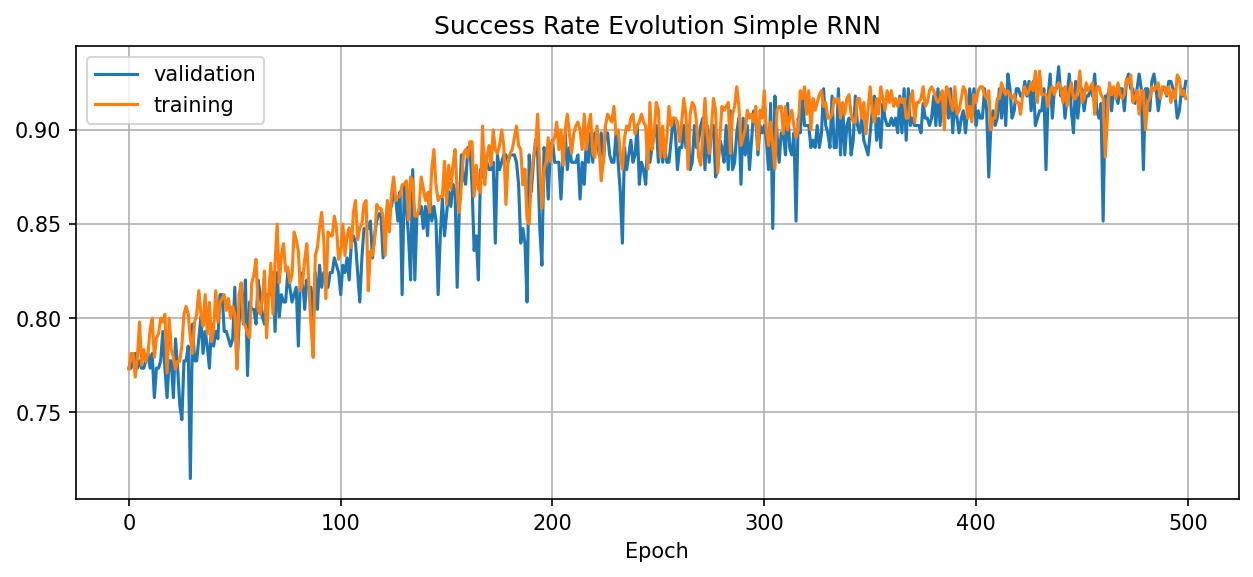

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
plt.plot(history.epoch,history.history['val_porcentaje_margen'],label='validation')
plt.plot(history.epoch,history.history['porcentaje_margen'],label='training')
plt.legend()
plt.title('Success Rate Evolution Simple RNN')
plt.xlabel('Epoch')
plt.grid()
plt.savefig('SimpleRNN Success Rate.jpg',dpi=300)
plt.show()

LSTM

In [ ]:
model = Sequential()
model.add(LSTM(5, return_sequences=False, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0005),loss='mse',metrics=[porcentaje_margen])


In [ ]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test,y_test),verbose=1)

Epoch 1/500
15/15 [==============================] - 2s 42ms/step - loss: 0.2257 - porcentaje_margen: 0.0000e+00 - val_loss: 0.2232 - val_porcentaje_margen: 0.0000e+00
Epoch 2/500
15/15 [==============================] - 0s 11ms/step - loss: 0.2026 - porcentaje_margen: 0.0000e+00 - val_loss: 0.1986 - val_porcentaje_margen: 0.0000e+00
Epoch 3/500
15/15 [==============================] - 0s 11ms/step - loss: 0.1769 - porcentaje_margen: 0.0000e+00 - val_loss: 0.1702 - val_porcentaje_margen: 0.0000e+00
Epoch 4/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1480 - porcentaje_margen: 0.0000e+00 - val_loss: 0.1382 - val_porcentaje_margen: 0.0000e+00
Epoch 5/500
15/15 [==============================] - 0s 11ms/step - loss: 0.1149 - porcentaje_margen: 0.0000e+00 - val_loss: 0.1009 - val_porcentaje_margen: 0.0000e+00
Epoch 6/500
15/15 [==============================] - 0s 14ms/step - loss: 0.0759 - porcentaje_margen: 0.0000e+00 - val_loss: 0.0562 - val_porcentaje_margen: 0.0

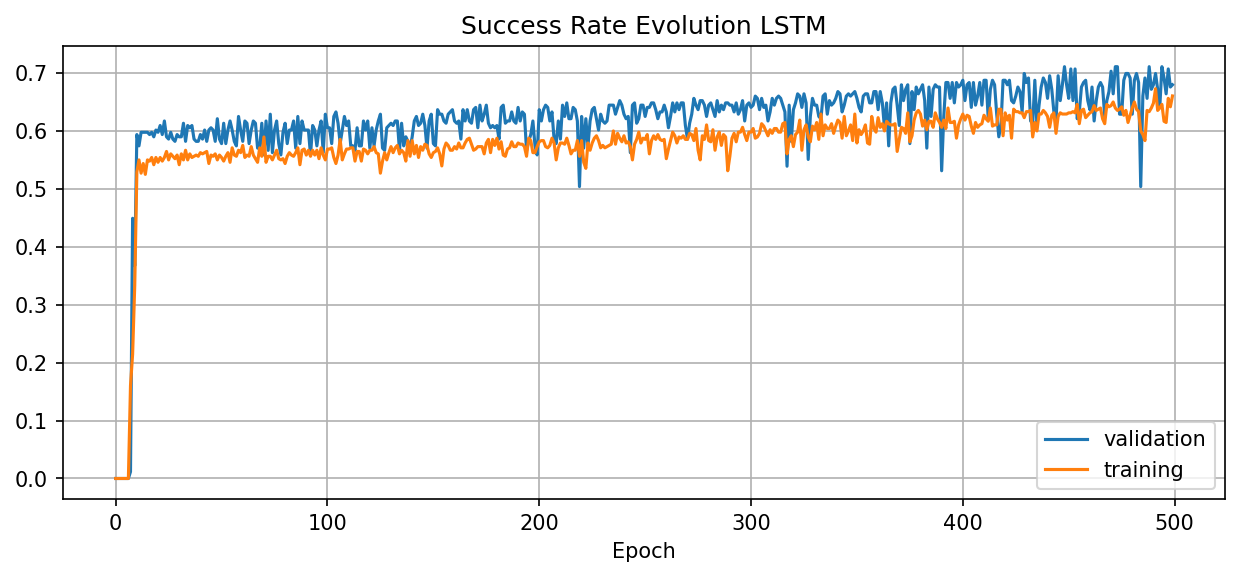

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
plt.plot(history.epoch,history.history['val_porcentaje_margen'],label='validation')
plt.plot(history.epoch,history.history['porcentaje_margen'],label='training')
plt.legend()
plt.title('Success Rate Evolution LSTM')
plt.xlabel('Epoch')
plt.grid()
plt.savefig('LSTM Success Rate.jpg',dpi=300)
plt.show()

GRU

In [ ]:
model = Sequential()
model.add(GRU(5, return_sequences=False, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0005),loss='mse',metrics=[porcentaje_margen])

In [ ]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test,y_test),verbose=1)

Epoch 1/500
15/15 [==============================] - 3s 37ms/step - loss: 0.1301 - porcentaje_margen: 0.0000e+00 - val_loss: 0.1144 - val_porcentaje_margen: 0.0000e+00
Epoch 2/500
15/15 [==============================] - 0s 11ms/step - loss: 0.0925 - porcentaje_margen: 0.0000e+00 - val_loss: 0.0785 - val_porcentaje_margen: 0.0000e+00
Epoch 3/500
15/15 [==============================] - 0s 12ms/step - loss: 0.0609 - porcentaje_margen: 0.0000e+00 - val_loss: 0.0499 - val_porcentaje_margen: 0.0000e+00
Epoch 4/500
15/15 [==============================] - 0s 13ms/step - loss: 0.0366 - porcentaje_margen: 0.0000e+00 - val_loss: 0.0283 - val_porcentaje_margen: 0.0000e+00
Epoch 5/500
15/15 [==============================] - 0s 12ms/step - loss: 0.0192 - porcentaje_margen: 0.0000e+00 - val_loss: 0.0139 - val_porcentaje_margen: 0.0000e+00
Epoch 6/500
15/15 [==============================] - 0s 12ms/step - loss: 0.0085 - porcentaje_margen: 0.0000e+00 - val_loss: 0.0057 - val_porcentaje_margen: 0.0

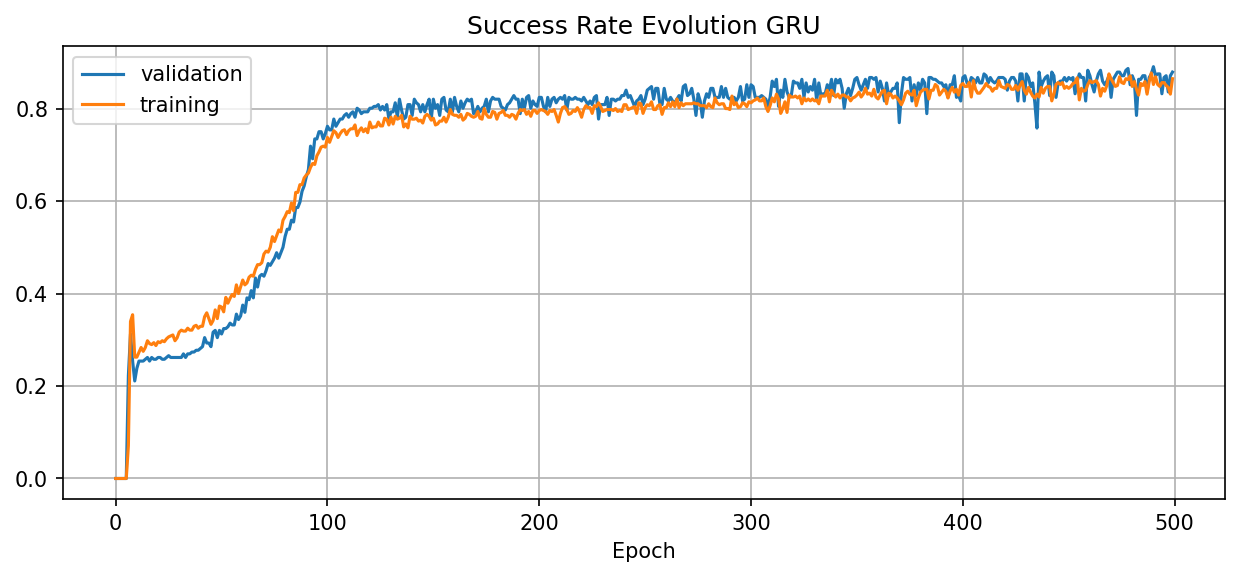

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
plt.plot(history.epoch,history.history['val_porcentaje_margen'],label='validation')
plt.plot(history.epoch,history.history['porcentaje_margen'],label='training')
plt.legend()
plt.title('Success Rate Evolution GRU')
plt.xlabel('Epoch')
plt.grid()
plt.savefig('GRU Success Rate.jpg',dpi=300)
plt.show()